# Data Cleaning with Pandas

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df.head(10)

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [2]:
df.shape

(9, 7)

In [3]:
# kita mau deteksi data hilang - dengan teknik otomatis Pandas
# pertama, kita perhatikan kolom ST_NUM dulu
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [4]:
# isnull() adalah built-in function Pandas untuk cek data yang hilang
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [5]:
# berikutnya, kita perlu beritahu Pandas data yang artinya sama dengan NaN (data hilang)
missing_values = ["n/a", "NA", "--", "na"]
# beri tahu ada data hilang
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", na_values = missing_values)
df.head(10)

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [6]:
df['NUM_BEDROOMS'].isnull() 

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [7]:
# UNEXPECTED missing data
# misalkan tipe data yang harusnya angka, tiba-tiba ada string, atau sebaliknya
df['NUM_BATH']

0         1
1       1.5
2         1
3       NaN
4         2
5         1
6    HURLEY
7         1
8         2
Name: NUM_BATH, dtype: object

In [8]:
counter = 0 # hitung jumlah row
for row in df['NUM_BATH']:
    try:
        float(row) # kalau berhasil convert ke float, datanya aman
    except ValueError:
        df.loc[counter, 'NUM_BATH'] = np.nan
    counter += 1
    
df.head(10)

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0      NaN   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [9]:
counter = 0 # hitung jumlah row
for row in df['OWN_OCCUPIED']:
    try:
        int(row) # kalau berhasil convert ke integer, berarti datanya tipe angka
        df.loc[counter, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    finally:
        counter += 1
    
df.head(10)

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0      NaN   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [10]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [11]:
df['NUM_BATH'].isnull()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: NUM_BATH, dtype: bool

## Summarize missing values

In [12]:
df['NUM_BATH'].isnull().sum()

2

In [13]:
df['OWN_OCCUPIED'].isnull().sum()

2

In [14]:
df.isnull().sum() 
# melihat keseluruhan data kita, per kolomnya ada berapa missing data

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

In [15]:
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [16]:
df.isnull().values.any()

True

## Replace missing value

- apakah mau diisi satu data
- atau mau diisi median data
- atau rata-rata data
- atau lainnya

In [17]:
df['ST_NUM'].fillna(125, inplace=True) # diganti dengan 1 data spesifik

In [18]:
df.head(10)

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0   125.0   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0   125.0  WASHINGTON          NaN           2.0      NaN   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [19]:
df.isnull().any()


PID              True
ST_NUM          False
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [20]:
# diganti dengan median
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df.head(10)

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0   125.0   LEXINGTON            N           3.0        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           3.0        1   800.0
6  100007000.0   125.0  WASHINGTON          NaN           2.0      NaN   950.0
7  100008000.0   213.0     TREMONT            Y           3.0        1     NaN
8  100009000.0   215.0     TREMONT            Y           3.0        2  1800.0

In [21]:
df.isnull().any()

PID              True
ST_NUM          False
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS    False
NUM_BATH         True
SQ_FT            True
dtype: bool

## contoh lainnya

### Data Obesitas

In [22]:
raw_data = pd.ExcelFile('data/obes.xls')

In [23]:
raw_data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [24]:
data_age = raw_data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age

Unnamed: 0    Total  Under 16  16-24   25-34   35-44   45-54   55-64  \
0         NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN   
1     2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   
2     2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   
3     2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   
4     2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   
5     2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0   
6     2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0   
7     2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0   
8     2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0   
9     2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0   
10    2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0   
11    2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0   

    65-74  75 and over  
0     NaN          NaN  
1    52.0         23.0  
2    52.0         24.0  
3    36.0         32.0  
4    72.0         20.0  
5   118.0         43.0  
6   157.0         53.0  
7   221.0         63.0  
8   378.0         87.0  
9   456.0        115.0  
10  468.0         94.0  
11  495.0         99.0

In [26]:
# ubah nama kolom, jangan lupa gunakan opsi inplace untuk merubah data awal
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
data_age

Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
0       NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN    NaN   
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

    75 and over  
0           NaN  
1          23.0  
2          24.0  
3          32.0  
4          20.0  
5          43.0  
6          53.0  
7          63.0  
8          87.0  
9         115.0  
10         94.0  
11         99.0

In [27]:
# hapus row yang isinya kosong
data_age.dropna(inplace = True)
data_age.head()

Year   Total  Under 16  16-24  25-34   35-44  45-54  55-64  65-74  \
1  2002/03  1275.0     400.0   65.0  136.0   289.0  216.0   94.0   52.0   
2  2003/04  1711.0     579.0   67.0  174.0   391.0  273.0  151.0   52.0   
3  2004/05  2035.0     547.0  107.0  287.0   487.0  364.0  174.0   36.0   
4  2005/06  2564.0     583.0   96.0  341.0   637.0  554.0  258.0   72.0   
5  2006/07  3862.0     656.0  184.0  461.0  1069.0  872.0  459.0  118.0   

   75 and over  
1         23.0  
2         24.0  
3         32.0  
4         20.0  
5         43.0

In [28]:
# kita gunakan column "Year" sebagai column index agar lebih informatif
data_age.set_index('Year', inplace=True)
data_age

Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
Year                                                                       
2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

         75 and over  
Year                  
2002/03         23.0  
2003/04         24.0  
2004/05         32.0  
2005/06         20.0  
2006/07         43.0  
2007/08         53.0  
2008/09         63.0  
2009/10         87.0  
2010/11        115.0  
2011/12         94.0  
2012/13         99.0

In [29]:
data_age.loc['2011/12']

Total          11736.0
Under 16         495.0
16-24            391.0
25-34           1484.0
35-44           3104.0
45-54           3581.0
55-64           2119.0
65-74            468.0
75 and over       94.0
Name: 2011/12, dtype: float64

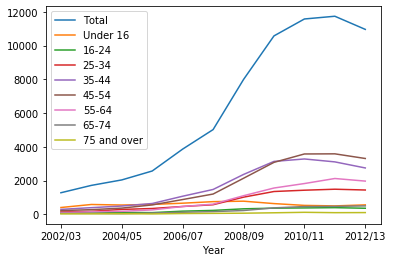

In [30]:
data_age.plot()

In [31]:
# cara hapus kolom total agar tidak mengganggu kita baca data plot
data_age_tanpa_total = data_age.drop('Total', axis=1)

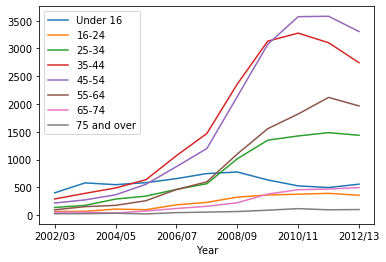

In [32]:
data_age_tanpa_total.plot()

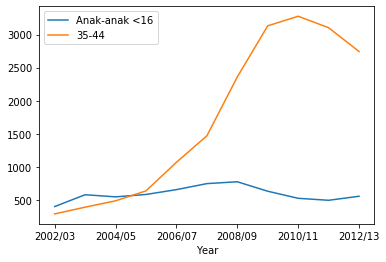

In [33]:
# disini kita meng analisa data, sesuai pertanyaan awal, lalu menarik kesimpulan
data_age['Under 16'].plot(label="Anak-anak <16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

## TIme series

In [34]:
from datetime import datetime

In [35]:
range(2,11,2)

range(2, 11, 2)

In [36]:
# membuat range bentuk tanggal
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [37]:
pd.date_range('1/01/2020', '1/08/2020', freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [38]:
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100, size=len(date_rng))
df

date  data
0   2020-01-01 00:00:00    36
1   2020-01-01 01:00:00    80
2   2020-01-01 02:00:00    16
3   2020-01-01 03:00:00    10
4   2020-01-01 04:00:00    57
..                  ...   ...
164 2020-01-07 20:00:00     9
165 2020-01-07 21:00:00    92
166 2020-01-07 22:00:00    76
167 2020-01-07 23:00:00    46
168 2020-01-08 00:00:00    42

[169 rows x 2 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [40]:
# misalnya data kita belum bertime datetime, kita bisa convert tipe datanya ke datetime dengan .to_datetime()
df['datetime'] = pd.to_datetime(df['date'])
df

date  data            datetime
0   2020-01-01 00:00:00    36 2020-01-01 00:00:00
1   2020-01-01 01:00:00    80 2020-01-01 01:00:00
2   2020-01-01 02:00:00    16 2020-01-01 02:00:00
3   2020-01-01 03:00:00    10 2020-01-01 03:00:00
4   2020-01-01 04:00:00    57 2020-01-01 04:00:00
..                  ...   ...                 ...
164 2020-01-07 20:00:00     9 2020-01-07 20:00:00
165 2020-01-07 21:00:00    92 2020-01-07 21:00:00
166 2020-01-07 22:00:00    76 2020-01-07 22:00:00
167 2020-01-07 23:00:00    46 2020-01-07 23:00:00
168 2020-01-08 00:00:00    42 2020-01-08 00:00:00

[169 rows x 3 columns]

In [41]:
# mempermudah kita, ubah index nya menjadi kolom date
df = df.set_index('datetime')
df

date  data
datetime                                     
2020-01-01 00:00:00 2020-01-01 00:00:00    36
2020-01-01 01:00:00 2020-01-01 01:00:00    80
2020-01-01 02:00:00 2020-01-01 02:00:00    16
2020-01-01 03:00:00 2020-01-01 03:00:00    10
2020-01-01 04:00:00 2020-01-01 04:00:00    57
...                                 ...   ...
2020-01-07 20:00:00 2020-01-07 20:00:00     9
2020-01-07 21:00:00 2020-01-07 21:00:00    92
2020-01-07 22:00:00 2020-01-07 22:00:00    76
2020-01-07 23:00:00 2020-01-07 23:00:00    46
2020-01-08 00:00:00 2020-01-08 00:00:00    42

[169 rows x 2 columns]

In [42]:
df.drop(['date'], axis=1, inplace=True)
df

data
datetime                 
2020-01-01 00:00:00    36
2020-01-01 01:00:00    80
2020-01-01 02:00:00    16
2020-01-01 03:00:00    10
2020-01-01 04:00:00    57
...                   ...
2020-01-07 20:00:00     9
2020-01-07 21:00:00    92
2020-01-07 22:00:00    76
2020-01-07 23:00:00    46
2020-01-08 00:00:00    42

[169 rows x 1 columns]

In [43]:
# ubah string jadi datetime
str_date = ['June-01-2020', 'June-02-2020', 'June-03-2020']
timestamp = [datetime.strptime(date,'%B-%d-%Y') for date in str_date]
timestamp

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [44]:
# ubah datetime jadi string
str_date = [str(date) for date in df.index]
str_date

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [45]:
# mengambil data spesifik per tanggal dari dataframe 
df['2020-01-05'] # tahun-bulan-tanggal, kita bisa ambil data untuk tanggal spesifik


data
datetime                 
2020-01-05 00:00:00    57
2020-01-05 01:00:00    57
2020-01-05 02:00:00    11
2020-01-05 03:00:00    36
2020-01-05 04:00:00    19
2020-01-05 05:00:00    27
2020-01-05 06:00:00    38
2020-01-05 07:00:00    87
2020-01-05 08:00:00    66
2020-01-05 09:00:00    18
2020-01-05 10:00:00    20
2020-01-05 11:00:00    57
2020-01-05 12:00:00    79
2020-01-05 13:00:00    96
2020-01-05 14:00:00    67
2020-01-05 15:00:00    99
2020-01-05 16:00:00    18
2020-01-05 17:00:00    82
2020-01-05 18:00:00    59
2020-01-05 19:00:00     8
2020-01-05 20:00:00    87
2020-01-05 21:00:00    13
2020-01-05 22:00:00    81
2020-01-05 23:00:00    35

In [46]:
df['2020-01-05'].shape

(24, 1)

In [47]:
# ambil range datetime
df['2020-01-04':'2020-01-06']

data
datetime                 
2020-01-04 00:00:00     1
2020-01-04 01:00:00    17
2020-01-04 02:00:00    57
2020-01-04 03:00:00    45
2020-01-04 04:00:00    45
...                   ...
2020-01-06 19:00:00    67
2020-01-06 20:00:00    68
2020-01-06 21:00:00     8
2020-01-06 22:00:00    44
2020-01-06 23:00:00    78

[72 rows x 1 columns]

In [48]:
df['2020-01-04 09:00:00':'2020-01-04 21:00:00']

data
datetime                 
2020-01-04 09:00:00    24
2020-01-04 10:00:00    47
2020-01-04 11:00:00    69
2020-01-04 12:00:00    91
2020-01-04 13:00:00    81
2020-01-04 14:00:00    78
2020-01-04 15:00:00    68
2020-01-04 16:00:00    28
2020-01-04 17:00:00    45
2020-01-04 18:00:00    63
2020-01-04 19:00:00    31
2020-01-04 20:00:00    55
2020-01-04 21:00:00    33

In [49]:
df.resample('D').sum()

data
datetime        
2020-01-01  1241
2020-01-02  1045
2020-01-03   903
2020-01-04  1170
2020-01-05  1217
2020-01-06  1106
2020-01-07  1127
2020-01-08    42

In [50]:
# menggunakan datetime sebagai index lebih mempermudah dibanding
# menggunakan string biasa sebagai index
# kita juga bisa pakai resample untuk mengubah jumlah datanya, misalnya per hari bukan per jam
# cara rangkum datanya apakah mau di min, max, mean (rata2), sum, atau lainnya?

In [51]:
# juga bisa buat yang lebih menarik lagi seperti rolling sum
# contohnya melihat total customer 3 hari terakhir
df.resample('D').sum().rolling(3).sum()

data
datetime          
2020-01-01     NaN
2020-01-02     NaN
2020-01-03  3189.0
2020-01-04  3118.0
2020-01-05  3290.0
2020-01-06  3493.0
2020-01-07  3450.0
2020-01-08  2275.0

In [53]:
df.rolling(3).sum()

data
datetime                  
2020-01-01 00:00:00    NaN
2020-01-01 01:00:00    NaN
2020-01-01 02:00:00  132.0
2020-01-01 03:00:00  106.0
2020-01-01 04:00:00   83.0
...                    ...
2020-01-07 20:00:00  133.0
2020-01-07 21:00:00  128.0
2020-01-07 22:00:00  177.0
2020-01-07 23:00:00  214.0
2020-01-08 00:00:00  164.0

[169 rows x 1 columns]

In [54]:
df['rolling_sum_3jam'] = df.rolling(3).sum()
df

data  rolling_sum_3jam
datetime                                   
2020-01-01 00:00:00    36               NaN
2020-01-01 01:00:00    80               NaN
2020-01-01 02:00:00    16             132.0
2020-01-01 03:00:00    10             106.0
2020-01-01 04:00:00    57              83.0
...                   ...               ...
2020-01-07 20:00:00     9             133.0
2020-01-07 21:00:00    92             128.0
2020-01-07 22:00:00    76             177.0
2020-01-07 23:00:00    46             214.0
2020-01-08 00:00:00    42             164.0

[169 rows x 2 columns]

In [55]:
# metode lain fillna bisa dilihat di sini juga https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
df['rolling_sum_3jam'] = df['rolling_sum_3jam'].fillna(method='backfill')
df

data  rolling_sum_3jam
datetime                                   
2020-01-01 00:00:00    36             132.0
2020-01-01 01:00:00    80             132.0
2020-01-01 02:00:00    16             132.0
2020-01-01 03:00:00    10             106.0
2020-01-01 04:00:00    57              83.0
...                   ...               ...
2020-01-07 20:00:00     9             133.0
2020-01-07 21:00:00    92             128.0
2020-01-07 22:00:00    76             177.0
2020-01-07 23:00:00    46             214.0
2020-01-08 00:00:00    42             164.0

[169 rows x 2 columns]

## Menggunakan datatime index di data asli

In [56]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv')

In [57]:
opsd_daily.shape

(4383, 5)

In [58]:
opsd_daily.head(3)

Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN

In [59]:
opsd_daily.set_index('Date', inplace=True)
opsd_daily.head()

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN

In [61]:
opsd_daily.index 
# tipe data nya masih object bukan datetime
# boleh ubah index nya jadi tipe data datetime, pakai loop, atau kita pakai shortcut parse_dates saat baca datanya

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [62]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [63]:
# kita mau lihat trend pemakaian listrik dari tahun ke tahun, dari per bulannya, 
# dan per minggu apakah ada hari tertentu yang berbeda
# jadi, kita buat kolom baru untuk tahun, bulan, dan hari (per minggu)
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday
opsd_daily

Consumption     Wind   Solar  Wind+Solar  Year  Month  Weekday
Date                                                                      
2006-01-01   1069.18400      NaN     NaN         NaN  2006      1        6
2006-01-02   1380.52100      NaN     NaN         NaN  2006      1        0
2006-01-03   1442.53300      NaN     NaN         NaN  2006      1        1
2006-01-04   1457.21700      NaN     NaN         NaN  2006      1        2
2006-01-05   1477.13100      NaN     NaN         NaN  2006      1        3
...                 ...      ...     ...         ...   ...    ...      ...
2017-12-27   1263.94091  394.507  16.530     411.037  2017     12        2
2017-12-28   1299.86398  506.424  14.162     520.586  2017     12        3
2017-12-29   1295.08753  584.277  29.854     614.131  2017     12        4
2017-12-30   1215.44897  721.247   7.467     728.714  2017     12        5
2017-12-31   1107.11488  721.176  19.980     741.156  2017     12        6

[4383 rows x 7 columns]

In [64]:
# melihat pemakaian listrik di tahun tertentu
opsd_daily.loc['2012']

Consumption     Wind   Solar  Wind+Solar  Year  Month  Weekday
Date                                                                      
2012-01-01      948.128  227.465   6.587     234.052  2012      1        6
2012-01-02     1269.581  207.327   6.574     213.901  2012      1        0
2012-01-03     1334.745  473.468  24.679     498.147  2012      1        1
2012-01-04     1347.136  499.804  14.681     514.485  2012      1        2
2012-01-05     1376.658  523.851   5.071     528.922  2012      1        3
...                 ...      ...     ...         ...   ...    ...      ...
2012-12-27     1068.617  302.195  13.111     315.306  2012     12        3
2012-12-28     1109.424  152.562  24.007     176.569  2012     12        4
2012-12-29     1014.550  294.502  38.122     332.624  2012     12        5
2012-12-30      936.786  412.921  27.255     440.176  2012     12        6
2012-12-31      969.810  446.492  25.097     471.589  2012     12        0

[366 rows x 7 columns]

In [65]:
# melihat pemakaian listrik di tahun jan-mar tahun 2015
opsd_daily.loc['2015-01':'2015-03']

Consumption     Wind    Solar  Wind+Solar  Year  Month  Weekday
Date                                                                       
2015-01-01     1111.336  325.128   17.079     342.207  2015      1        3
2015-01-02     1300.884  603.558    7.758     611.316  2015      1        4
2015-01-03     1265.271  462.953    7.236     470.189  2015      1        5
2015-01-04     1198.854  385.024   19.984     405.008  2015      1        6
2015-01-05     1449.861  216.543   26.524     243.067  2015      1        0
...                 ...      ...      ...         ...   ...    ...      ...
2015-03-27     1499.701  219.296   76.244     295.540  2015      3        4
2015-03-28     1274.136  214.583  115.420     330.003  2015      3        5
2015-03-29     1187.673  521.684   37.867     559.551  2015      3        6
2015-03-30     1500.454  610.862   90.403     701.265  2015      3        0
2015-03-31     1517.419  624.674   69.416     694.090  2015      3        1

[90 rows x 7 columns]

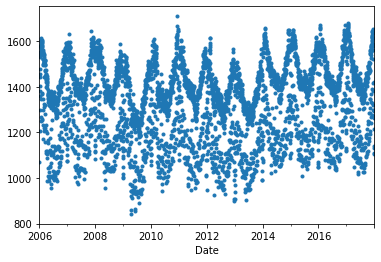

In [66]:
opsd_daily['Consumption'].plot(marker=".", linestyle="None")

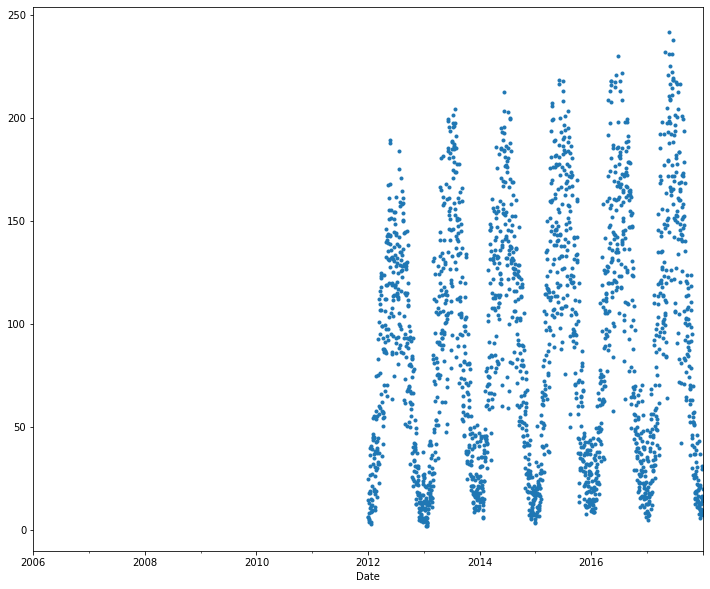

In [67]:
opsd_daily['Solar'].plot(marker=".", linestyle="None", figsize=(12,10))

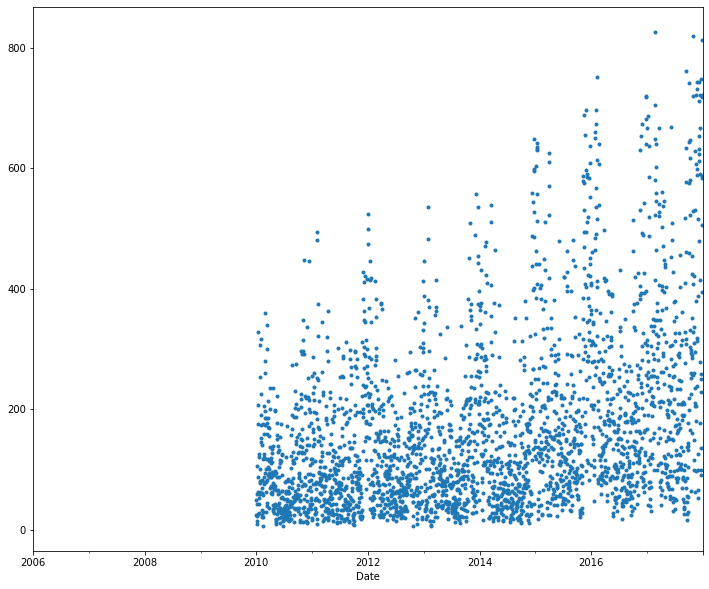

In [68]:
opsd_daily['Wind'].plot(marker=".", linestyle="None", figsize=(12,10))

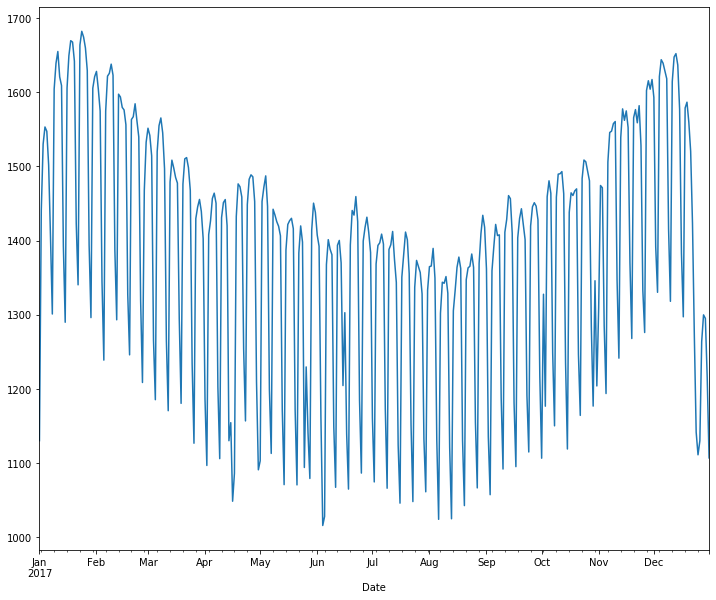

In [69]:
opsd_daily.loc['2017', 'Consumption'].plot(figsize=(12,10))

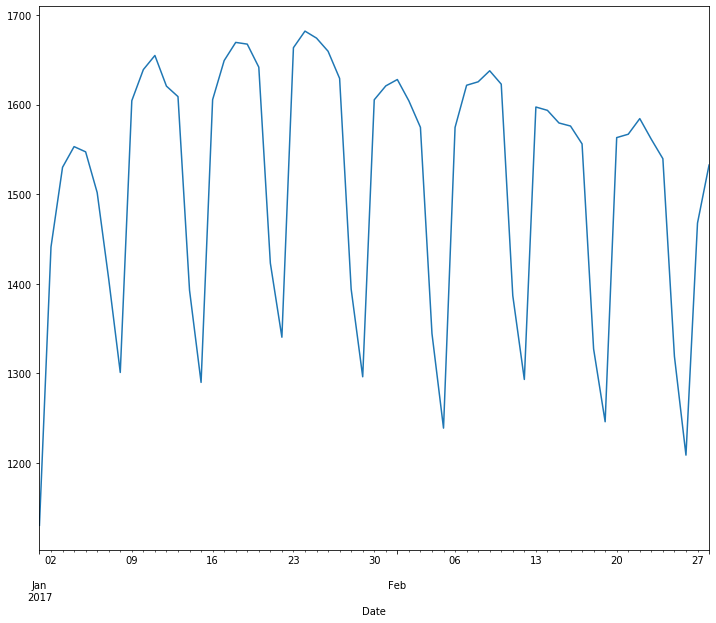

In [70]:
opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(figsize=(12,10))

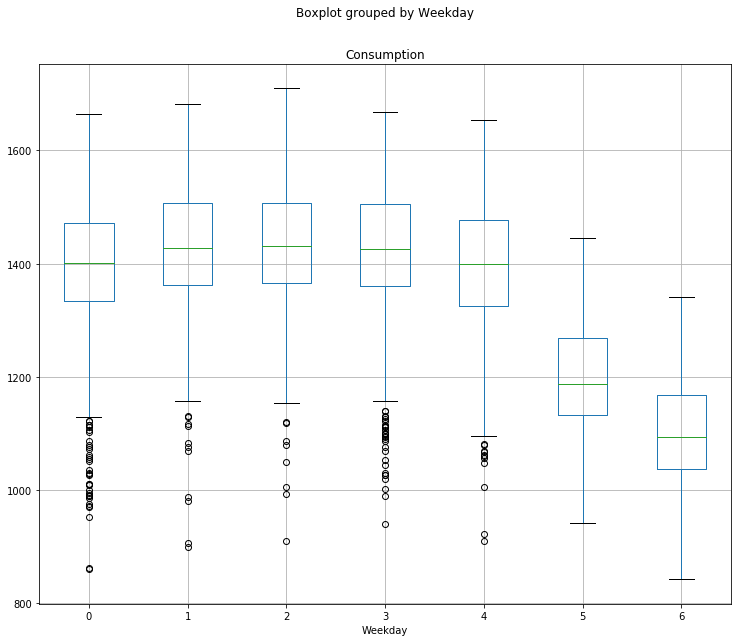

In [71]:
opsd_daily.boxplot(column="Consumption", by="Weekday", figsize=(12,10))

dari sini kita bisa menarik beberapa konklusi tentang pemakaian listrik per hari tertentu per minggunya.

Selain itu, kita bisa pakai teknik resample untuk melihat trend pemakaian listrik apakah naik dari minggu ke minggu

In [72]:
data_columns = ['Consumption','Wind','Solar','Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean

Consumption        Wind      Solar  Wind+Solar
Date                                                      
2006-01-01  1069.184000         NaN        NaN         NaN
2006-01-08  1381.300143         NaN        NaN         NaN
2006-01-15  1486.730286         NaN        NaN         NaN
2006-01-22  1490.031143         NaN        NaN         NaN
2006-01-29  1514.176857         NaN        NaN         NaN
...                 ...         ...        ...         ...
2017-12-03  1536.236314  284.334286  18.320857  302.655143
2017-12-10  1554.824946  636.514714  16.440286  652.955000
2017-12-17  1543.856889  442.531857  18.143714  460.675571
2017-12-24  1440.342401  339.018429   9.895143  348.913571
2017-12-31  1203.265211  604.699143  19.240143  623.939286

[627 rows x 4 columns]

In [73]:
opsd_weekly_mean.shape

(627, 4)

In [74]:
opsd_daily.shape


(4383, 7)

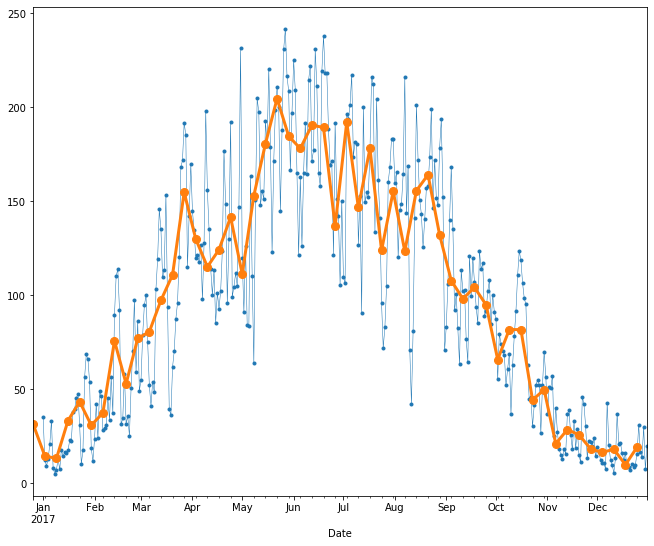

In [75]:
start, end = '2017-01', '2017-12'

opsd_daily.loc[start:end, 'Solar'].plot(marker=".", linestyle="-", linewidth="0.5", figsize=(11,9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker="o", markersize=8, linestyle="-", linewidth="3", figsize=(11,9))